In [4]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
df = pd.read_csv('/content/spam.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Exploratory data analysis (EDA):**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [8]:
df['Category'].value_counts()

Category
ham     4825
spam     747
Name: count, dtype: int64

In [9]:
# Some Emails
print(df['Message'][0])
print(df['Message'][2])
print(df['Message'][5])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


**Data Preprocessing:**

In [10]:
# Lower casing messages
df['Message'] = df['Message'].str.lower()

# Removing '#' tag
df['Message'] = df['Message'].str.replace('#','')

# Removing '@'
df['Message'] = df['Message'].str.replace('@','')

# Removing URLs
df['Message'] = df['Message'].str.replace(r'^https?:\/\/.*[\r\n]*','')

# Removing Punctuations
df['Message'] = df['Message'].str.translate(str.maketrans('', '', string.punctuation))

In [11]:
# creating a new column by encoding category columns
df['spam'] = df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,go until jurong point crazy available only in ...,0
1,ham,ok lar joking wif u oni,0
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1
3,ham,u dun say so early hor u c already then say,0
4,ham,nah i dont think he goes to usf he lives aroun...,0


**Models Training**

In [12]:
# Convert text data to numerical data
cv = CountVectorizer()

# Fitting CountVectorizer on X
X = cv.fit_transform(df['Message']).toarray()

Y = df['spam']

In [13]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

**Model 1 : Decision Tree Classifier**

In [14]:
DTC = DecisionTreeClassifier(max_depth=5)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [15]:
DTC_pred = DTC.predict(X_test)
DTC_accuracy = accuracy_score(y_test, DTC_pred)
DTC_accuracy

0.944377990430622

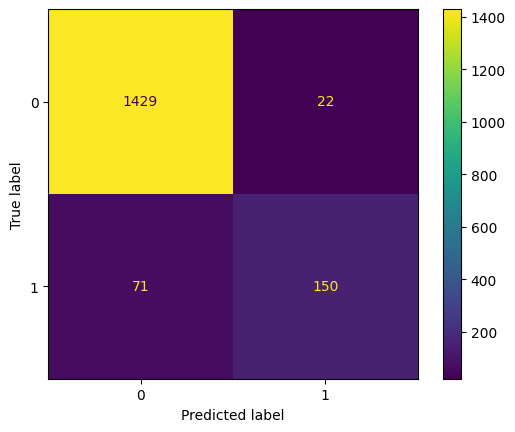

In [16]:
DTC_confusion = confusion_matrix(y_test, DTC_pred)
display = ConfusionMatrixDisplay(confusion_matrix = DTC_confusion, display_labels = [0, 1])
display.plot()
plt.show()

**Model 2 : Naive Bayes (Gaussian)**

In [17]:
NB = GaussianNB()
NB.fit(X_train, y_train)

GaussianNB()

In [18]:
NB_pred = NB.predict(X_test)
NB_accuracy = accuracy_score(y_test, NB_pred)
NB_accuracy

0.902511961722488

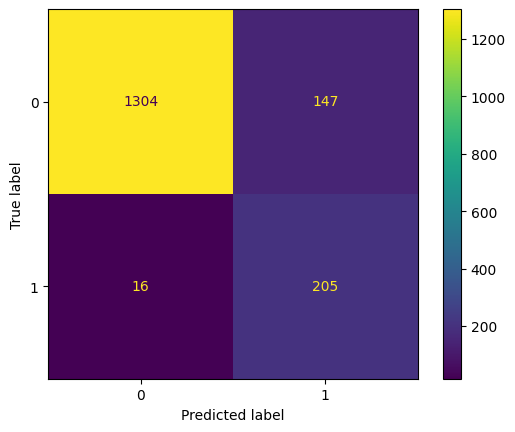

In [19]:
NB_confusion = confusion_matrix(y_test, NB_pred)
display = ConfusionMatrixDisplay(confusion_matrix = NB_confusion, display_labels = [0, 1])

display.plot()
plt.show()

**Model 3 :  Naive Bayes Multinomial**

In [20]:
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

MultinomialNB()

In [21]:
MNB_pred = MNB.predict(X_test)
MNB_accuracy = accuracy_score(y_test, MNB_pred)
MNB_accuracy

0.9808612440191388

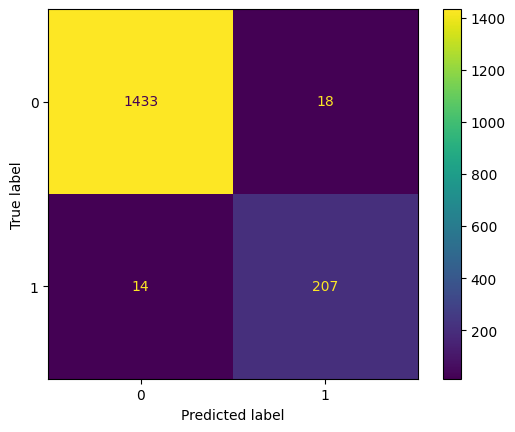

In [22]:
MNB_confusion = confusion_matrix(y_test, MNB_pred)
display = ConfusionMatrixDisplay(confusion_matrix = MNB_confusion, display_labels = [0, 1])

display.plot()
plt.show()

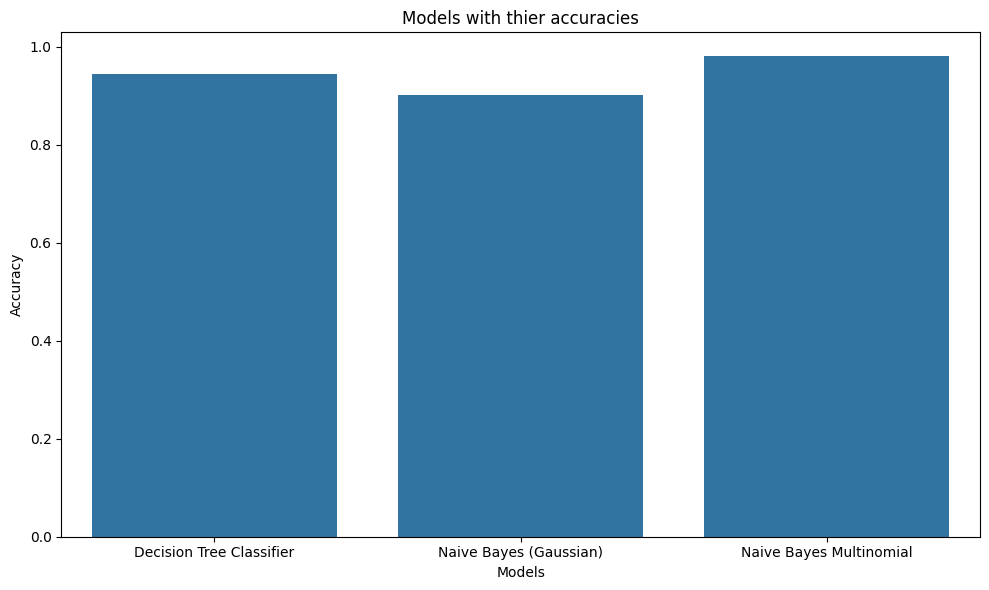

In [23]:
# Creating data containg models and their accuracies
data = pd.DataFrame({
    'Model': ['Decision Tree Classifier', 'Naive Bayes (Gaussian)', 'Naive Bayes Multinomial'],
    'Accuracy': [DTC_accuracy, NB_accuracy, MNB_accuracy]
})

# Bar chart for comparing model accuracies
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=data)
plt.title("Models with thier accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.tight_layout()

plt.show()

In [25]:
# Best Performing model
data[data['Accuracy']==data['Accuracy'].max()]

,Model,Accuracy
2,Naive Bayes Multinomial,0.980861
